# **Introduction**
Module 4 Sprint 3

In this project, I am analyzing a dataset of 891 Coursera courses using Python (mainly pandas, NumPy) and visualizing insights with Matplotlib, Seaborn, and Plotly. The work was done using Jupyter Notebook and Google Colab.

**Project Goals**

The main goal is to explore the structure of the dataset, check for missing or unusual values, and uncover interesting trends in course ratings, enrollment numbers, difficulty levels, certificate types, and course providers. This is a hands-on exercise to practice real-world data analysis using pandas and data visualization libraries.

The project is divided into five main parts:

* Data Preparation

* Data Cleaning

* Exploratory Data Analysis (EDA)

* Outlier Analysis

* Bivariate Analysis


**Tools Used**

Python: pandas, NumPy

Visualization: Matplotlib, Seaborn, Plotly

Platforms: Jupyter Notebook, Google Colab

Dataset: [Coursera Course Dataset](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset?resource=download)

## Data Loading

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

df = pd.read_csv('coursea_data.csv')

# **Data Preparation**

In order to better understand the dataset, first was explored all columns, their data types, and general information.

Here is a sample of the first few rows:

In [ ]:
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [ ]:
print(f'This dataset has {df.shape[0]} rows and {df.shape[1]} columns.')


This dataset has 891 rows and 7 columns.


By running df.info(), we see:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


* No missing values were detected across any of the columns.
* Most columns are of type object (categorical), with only Unnamed: 0 (integer) and course_rating (float) being numeric.
* Importantly, the course_students_enrolled column is currently an object type because it includes string values like "5.3k", which should be cleaned and converted to numeric later.

Checking for duplicate rows:

In [ ]:
df.duplicated().sum()

np.int64(0)

The result showed 0 duplicates

##Numeric Columns

Running df.describe() returns:

In [ ]:
df.describe()

,Unnamed: 0,course_rating
count,891.000000,891.000000
mean,445.000000,4.677329
std,257.353842,0.162225
min,0.000000,3.300000
25%,222.500000,4.600000
50%,445.000000,4.700000
75%,667.500000,4.800000
max,890.000000,5.000000


The course_rating values are generally high, ranging from 3.3 to 5.0.

##Categorical Columns

Running df.describe(include='object') provides:

In [ ]:
 df.describe(include='object')


,course_title,course_organization,course_Certificate_type,course_difficulty,course_students_enrolled
count,891,891,891,891,891
unique,888,154,3,4,205
top,Developing Your Musicianship,University of Pennsylvania,COURSE,Beginner,120k
freq,2,59,582,487,22


* There are 3 different certificate types and 4 difficulty levels.

* The most frequent difficulty level is Beginner, suggesting a strong focus on entry-level courses. This will be explored in more detail later during the analysis.

**Summary:**
* The dataset contains 891 unique courses with no missing values and no duplicate entries.
* Most columns are categorical.
* The column course_students_enrolled needs cleaning to convert the "k" format (e.g., "5.3k" → 5300) into numerical values for further analysis.
* An initial review shows a dominance of beginner-level courses, which will be further investigated.

# **Data Cleaning**
During the data review, it was observed that the 'Course Students Enrolled' column was classified as an object type due to the presence of 'k' (thousands) and 'm' (millions) suffixes. To prepare the data for quantitative analysis, a cleaning function was implemented:

In [ ]:
def clean_enrollment(enrollment):
    if 'k' in enrollment:
        return int(float(enrollment.replace('k', '')) * 1000)
    elif 'm' in enrollment:
        return int(float(enrollment.replace('m', '')) * 1000000)
    else:
        return int(float(enrollment))

df['course_students_enrolled'] =df['course_students_enrolled'].apply(clean_enrollment)
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


After this cleaning step, the Course Students Enrolled column was successfully converted to int type, enabling accurate numerical analysis.



Additionally, it was noted that the 'Course Certificate Type' column contained all-uppercase values, which were visually harsh. To improve readability, the values were normalized to Title Case:

In [ ]:
df['course_Certificate_type'] = df['course_Certificate_type'].str.title()

In addition, column names were improved by:
* Replacing underscores (_) with spaces.
* Applying Title Case to make them cleaner and more presentable.
* Removing the unnecessary Unnamed: 0 column

In [ ]:
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df.columns = df.columns.str.replace('_', ' ').str.title()
df.head()

,Course Title,Course Organization,Course Certificate Type,Course Rating,Course Difficulty,Course Students Enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,Specialization,4.7,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,Course,4.7,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,Course,4.5,Mixed,130000
3,A Law Student's Toolkit,Yale University,Course,4.7,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.8,Mixed,320000


**Summary:**
The dataset is now clean, with consistent column naming, standardized text formatting, and correctly set data types. It is fully prepared for further exploration and analysis.

# **Exploratory Data Analysis (EDA)**

After preparing the dataset, Exploratory Data Analysis (EDA) was conducted to understand its structure, identify patterns, and detect potential anomalies. The objectives of this phase were to explore general trends, assess variable distributions, and uncover insights to guide deeper analysis.


**1. Overview of Student Enrollment**

To begin, the total number of enrolled students across all courses was calculated to gauge the overall scale of the dataset:

In [ ]:
print(f'Total number of enrolled students: {df["Course Students Enrolled"].sum():,}.')


Total number of enrolled students: 80,681,900.


Subsequently, the minimum and maximum number of students enrolled in a single course:

In [ ]:
min_student = df['Course Students Enrolled'].min()
max_student = df['Course Students Enrolled'].max()
print(f'Minimum number of students: {min_student}')
print(f'Maximum number of students: {max_student}')

Minimum number of students: 1500
Maximum number of students: 3200000


**Insight:** The number of enrolled students varies significantly across courses, ranging from as few as 1,500 to over 3 million. This wide spread indicates that course enrollments differ greatly and suggests the presence of strong outliers in the dataset.

**2. Distribution of Certification Types**

Next, the distribution of certificate types offered in the dataset was analyzed:

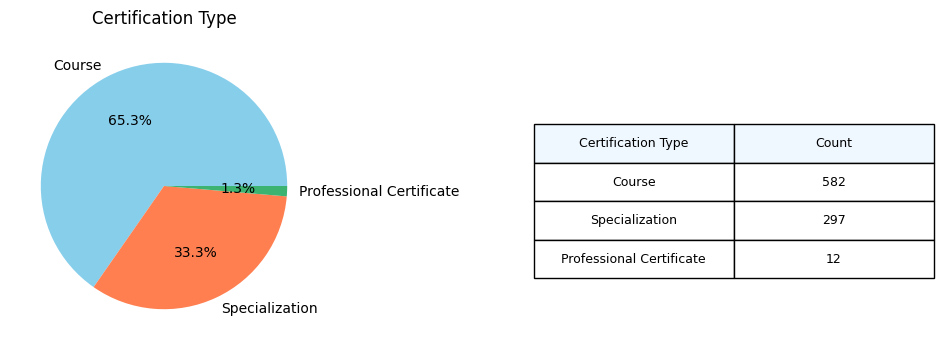

In [ ]:
certificates = df['Course Certificate Type'].value_counts()

plt.figure(figsize=(7, 4))
plt.pie(certificates, labels=certificates.index, autopct='%1.1f%%',
        colors=['skyblue','coral','mediumseagreen'])
plt.title('Certification Type')


table_data = certificates.reset_index()
table_data.columns = ['Certification Type', 'Count']
table = plt.table(cellText=table_data.values, colLabels=table_data.columns,
                  loc='right', cellLoc='center', colColours=["aliceblue"]*2,
                  bbox=[1.7, 0.2, 1.3, 0.5])

table.auto_set_font_size(False)
table.set_fontsize(9)

plt.show()


* Among 891 courses, 582 (over 65%) are standard "Course Certificates."
* Only 12 courses (about 1%) are classified as "Professional Certificates."

**Insight:**
Most Coursera courses in this dataset are typical individual courses rather than specialized professional programs.

**3. Distribution of Course Difficulty Levels**

Subsequently, explored how courses are distributed across different difficulty levels:

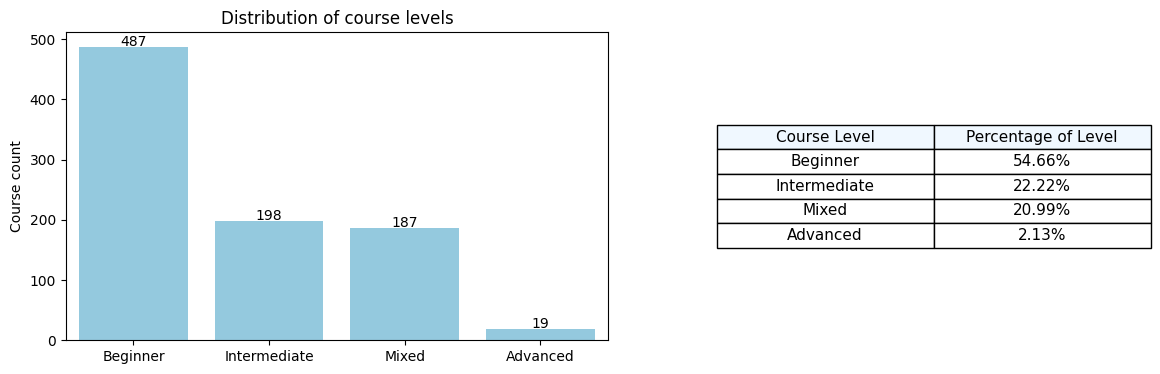

In [ ]:
plt.figure(figsize=(7, 4))
ax = sns.countplot(x='Course Difficulty', data=df, color='skyblue')
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2,
          height + 1, int(height), ha='center', fontsize=10)


plt.title("Distribution of course levels")
plt.xlabel('')
plt.ylabel("Course count")

level = df['Course Difficulty'].value_counts()
percent_level = (level / level.sum()) * 100
formatted_percent_level = percent_level.map("{:.2f}%".format)
level_table = formatted_percent_level.reset_index()

level_table.columns = ['Course Level', 'Percentage of Level']
percent_table = plt.table(cellText=level_table.values, colLabels=level_table.columns,
                  loc='right', cellLoc='center', colColours=["aliceblue"]*2,
                  bbox=[1.2, 0.3, 0.8, 0.4])

percent_table.auto_set_font_size(False)
percent_table.set_fontsize(11)
plt.show()

* 54% of courses are designed for **Beginners**.
* **Intermediate** and **Mixed** Levels are almost equally distributed.
* Only 2% of courses are **Advanced**.

**Insight:**
The platform seems heavily oriented toward beginner-level learners. This might suggest that the majority of Coursera's audience is either new to the subjects or prefers easier content for quick upskilling.

**4. Organizations Offering Courses**

Next, was checked how many unique organizations are represented:

In [ ]:
print(f' Dataset has {df["Course Organization"].nunique()} unique organizations.')

 Dataset has 154 unique organizations.


It was identified the top 10 organizations offering the most courses and calculated their percentages:

In [ ]:
organization = df['Course Organization'].value_counts()
top_organization = organization.head(10)
total_courses = organization.sum()

top_organization_percent = (top_organization / total_courses) * 100

top_org_table = pd.DataFrame({
    'Number of courses': top_organization,
    'Percentage of all courses': top_organization_percent.round(2)
})
top_org_table.index.name = None
top_org_table.insert(0, 'Rank', range(1, len(top_org_table) + 1))

top_org_table = top_org_table.style.format({
    'Number of courses': '{:,.0f}',
    'Percentage of all courses': '{:.2f}%'
}).set_properties(
    **{
        'text-align': 'right',
        'border': '1px solid black',
        'font-size': '14px',
        'padding': '8px'
    }
).set_table_styles([
    {'selector':'th','props':[('text-align','right'),('background-color','aliceblue')]}
])

top_org_table

,Rank,Number of courses,Percentage of all courses
University of Pennsylvania,1,59,6.62%
University of Michigan,2,41,4.60%
Google Cloud,3,34,3.82%
Duke University,4,28,3.14%
Johns Hopkins University,5,28,3.14%
"University of California, Irvine",6,27,3.03%
IBM,7,22,2.47%
University of Illinois at Urbana-Champaign,8,22,2.47%
"University of California, Davis",9,21,2.36%
University of Colorado Boulder,10,19,2.13%


Top organizations contribute a significant portion of the total course offerings.

Additionally, several notable observations were made:

In [ ]:
organization = df['Course Organization'].value_counts()
one_course = organization[organization == 1]
one_course_percent = (one_course.sum() / total_courses) * 100
print(f'{one_course_percent:.2f}% of organizations offer only one course.')

5.50% of organizations offer only one course.


**Insight:**
A small group of universities and companies dominates Coursera's catalog, while many organizations contribute only a single course.

**5. Distribution of Course Ratings**

Finally, it was examined how courses are rated by students:

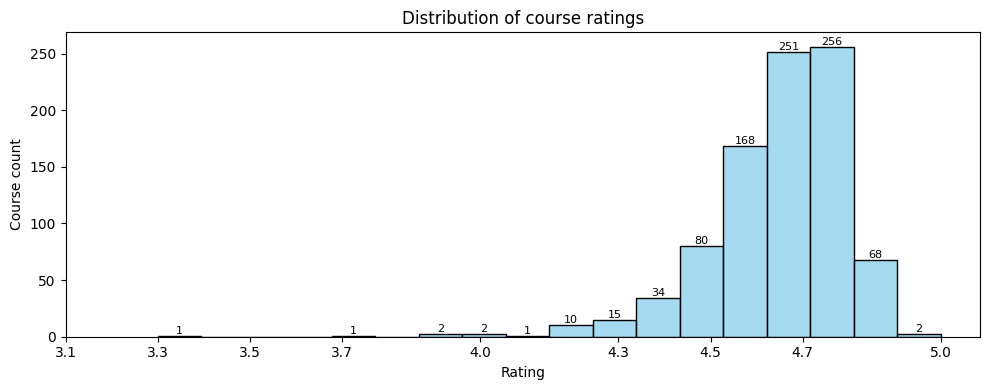

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(df['Course Rating'], bins=18, color='skyblue')

plt.xticks([3.1, 3.3, 3.5, 3.7, 4.0, 4.3, 4.5, 4.7, 5.0])
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            height,
            int(height),
            ha='center',
            va='bottom',
            fontsize=8,
            color='black'
        )

plt.title("Distribution of course ratings")
plt.xlabel("Rating")
plt.ylabel("Course count")
plt.tight_layout()
plt.show()

* Ratings are mostly concentrated between 4.3 and 4.9, with the highest frequency in the 4.7-4.8 range.
* Very few courses have ratings below 4.2 - only 7 courses (out of 891) are rated between 3.3 and 4.1.

**Insight:**
This distribution shows that the majority of Coursera courses in this dataset are rated highly, indicating generally positive learner experiences. However, the clustering of ratings in a narrow, high range (4.2-4.8) could also suggest rating inflation or a lack of critical feedback.

**Further Exploration:**
It would be valuable to explore whether courses with the highest ratings (4.7-4.8) also have the highest enrollment numbers, to better understand if a higher rating correlates with course popularity.

## Summary:
Through the EDA process, we gained valuable insights:

* Course enrollments and ratings are heavily skewed.
* Most courses are beginner-friendly.
* Some organisations dominate the course offer.
* Ratings are generally very high, possibly suggesting user satisfaction or rating inflation.

These findings will guide further analysis by highlighting key variables of interest and potential areas for deeper exploration.

# **Outlier Analysis**
The goal of this section is to detect and interpret unusual values in the dataset that deviate significantly from the norm. It was aim to identify whether these outliers are logical (e.g. highly popular courses) or data quality issues.

**Initial Summary Statistics**

Using .describe() on numerical columns:

In [ ]:
df[['Course Students Enrolled', 'Course Rating']].describe().round(2)



,Course Students Enrolled,Course Rating
count,891.00,891.00
mean,90552.08,4.68
std,181936.45,0.16
min,1500.00,3.30
25%,17500.00,4.60
50%,42000.00,4.70
75%,99500.00,4.80
max,3200000.00,5.00


The data already shows extreme values in Course Students Enrolled, with a max of over 3 million, which strongly suggests the presence of outliers. The Course Rating column also shows some values much lower than the typical range, down to 3.3, while most ratings are tightly grouped around 4.6-4.8.


**Boxplot Visualization of Outliers**

To visually examine outliers, boxplots were employed:

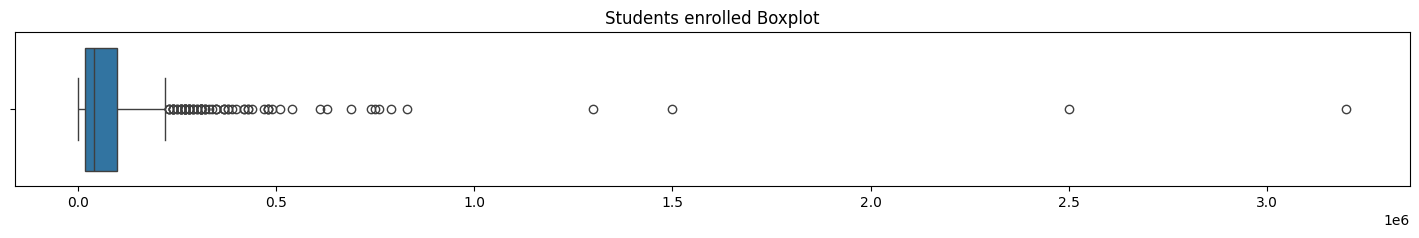

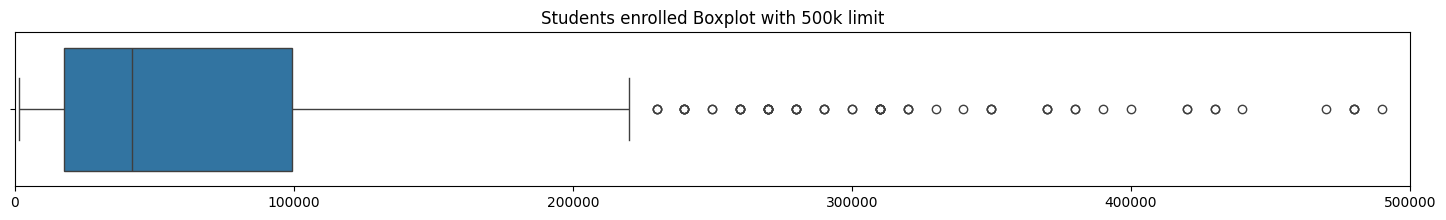

In [ ]:
plt.figure(figsize=(18, 2))
sns.boxplot(x=df['Course Students Enrolled'])
plt.title('Students enrolled Boxplot')
plt.xlabel('')
plt.show()

plt.figure(figsize=(18, 2))
sns.boxplot(x=df['Course Students Enrolled'])
plt.title('Students enrolled Boxplot with 500k limit')
plt.xlabel('')
plt.xlim(0, 500000)
plt.show()



* First Boxplot: Displays the full range of student enrollments, showing clear extreme outliers.
* Second Boxplot: Zooms in on enrollments below 500,000 to better visualize the typical distribution.

These plots reveal that while most courses have enrollments below 200,000, a subset of courses far exceed this, likely due to exceptional popularity or external promotion.

In [ ]:
stud_bins = pd.cut(
    df['Course Students Enrolled'],
    bins=[0, 5000, 50000, 200000, 1000000, 3500000],
    labels=['<1k', '1k-10k', '10k-100k', '500k-1M', '>1M']
)
df['Student Bins'] = stud_bins

To reduce skewness in student enrollments and assist with downstream analysis,  was grouped into bins. This transformation helps represent the data more meaningfully in visualizations and group-based analysis later.

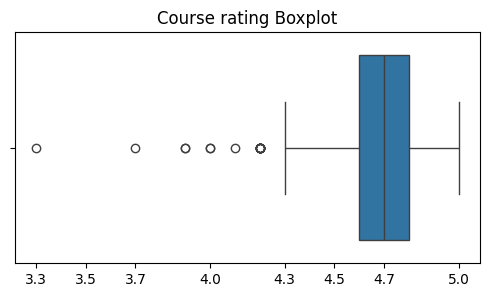

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Course Rating'])
plt.xticks([3.3, 3.5, 3.7, 4.0, 4.3, 4.5, 4.7, 5.0])
plt.title('Course rating Boxplot')
plt.xlabel('')
plt.show()


The boxplot for Course Rating, shows a few low-rated courses compared to the tightly packed majority near 4.7-4.8.

**IQR Method for Outlier Detection**

Applied the Interquartile Range (IQR) method to quantify outliers in both numeric columns:

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (outliers.shape[0] / df.shape[0]) * 100

    if not outliers.empty:
        outlier_summary[col] = {
            'count': outliers.shape[0],
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_values': outliers[col].values
        }

for col, info in outlier_summary.items():
    print(f"\nColumn: {col}")
    print(f"Outlier(s): {info['count']}")
    print(f"Limits: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
    print(f"Values: {info['outlier_values']}")
    print(f'Percentage of outliers: {info["count"] / df.shape[0] * 100:.2f}%')



Column: Course Rating
Outlier(s): 17
Limits: [4.30, 5.10]
Values: [4.2 4.2 4.2 4.2 3.3 4.1 4.2 4.2 4.  3.7 3.9 4.2 4.  4.2 4.2 4.2 3.9]
Percentage of outliers: 1.91%

Column: Course Students Enrolled
Outlier(s): 78
Limits: [-105500.00, 222500.00]
Values: [ 320000  350000  540000  320000  270000  480000  310000  280000  510000
  340000  790000  310000  350000  240000  830000  740000  690000  240000
  300000  380000  230000  760000  240000  490000  260000  470000  310000
  400000  290000  260000  350000  430000  260000  240000  480000  610000
  270000  310000  390000  270000  370000  270000  270000  270000  380000
  290000 3200000  240000  310000  280000  260000  230000  310000  290000
  630000  250000  330000  280000  250000 1300000  440000  230000  420000
 1500000  480000  370000  300000  430000  370000  750000  280000  420000
 2500000  320000  310000  280000  260000  270000]
Percentage of outliers: 8.75%


Course Rating - Most outliers are on the lower end of the scale (as low as 3.3), which may indicate poorly received courses. Given the small percentage, these outliers do not significantly impact the overall analysis.

Course Students Enrolled - These outliers include courses with more than 222,500 students enrolled. While extreme, these values may represent truly successful or heavily promoted courses. Further validation is recommended to rule out data entry errors.

#Summary:
Course Rating outliers (1.91%) are rare and expected in real-world feedback; they are retained for further analysis.

Student Enrollment outliers (8.75%) are more substantial and may reflect either very successful courses or anomalies. These were also retained, but we suggest checking for possible data errors before final modeling.

To handle extreme skewness in enrollments, binning was applied for better analysis and visualization.

# **Bivariate Analysis**

To better understand the relationships between key variables in the dataset, this section explores associations between course ratings, enrollment numbers, difficulty levels, certificate types, and course providers.

**Students Enrolled vs. Course Rating**


The correlation between the number of enrolled students and course rating is very weak (0.07), indicating almost no linear relationship.

In [ ]:
correlation = df['Course Students Enrolled'].corr(df['Course Rating'])
print(f'Correlation between students enrolled and course rating: {correlation:.2f}')

Correlation between students enrolled and course rating: 0.07


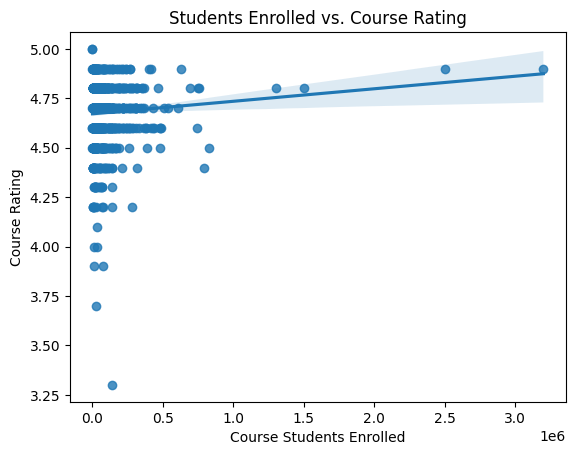

In [ ]:
sns.regplot(x='Course Students Enrolled', y='Course Rating', data=df)
plt.title('Students Enrolled vs. Course Rating')
plt.xlabel('Course Students Enrolled')
plt.ylabel('Course Rating')
plt.show()

**Insights:**

* The regression line trends slightly upward, suggesting a weak tendency for higher-enrolled courses to also have higher ratings.
* There are several outliers—courses with millions of students—that influence the distribution.
* Most data points are clustered, indicating many courses share similar enrollment.
* Some courses with relatively few students receive high ratings, highlighting the presence of niche but high-quality content.

**Course Difficulty vs. Students Enrolled**

To analyze how course difficulty influences enrollment, a box plot reveals the distribution more clearly.

In [ ]:
fig = px.box(
    df,
    x='Course Difficulty',
    y='Course Students Enrolled',
    points="all",
    color='Course Difficulty',
    title="Course Enrollment by Difficulty Level",
    log_y=True
)
fig.show()

**Insights:**

* Courses labeled “Mixed” attract the highest average number of students.
* Beginner-level courses are significantly more popular than advanced ones.
* Advanced and Intermediate average levels show wider variation, likely due to narrower audiences.
* However, the advance level has the lowest number of courses.

**Certificate Type vs. Students Enrolled**

In [ ]:
grouped_df = df.groupby("Course Certificate Type")["Course Students Enrolled"].agg(
    Average_Enrolled='mean',
    Total_Enrolled='sum'
).reset_index()

grouped_df = grouped_df.sort_values(by="Average_Enrolled", ascending=False)

fig = px.bar(
    grouped_df,
    x="Course Certificate Type",
    y="Average_Enrolled",
    title="Average Enrollment by Certificate Type",
    color="Course Certificate Type",
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text="Average_Enrolled",
    hover_data={
        "Average_Enrolled": ":.0f",
        "Total_Enrolled": ":,.0f"
    },
    labels={
        "Average_Enrolled": "Average Enrollment",
        "Total_Enrolled": "Total Students",
        "Course Certificate Type": "Certificate Type"
    }
)

fig.update_traces(texttemplate='%{text:.2s}')
fig.update_layout(width=800, height=400)

fig.show()


**Insights:**
* Professional Certificate courses attract the most students on average (190.700), suggesting higher perceived value.
* Specialization and Course certificates have smaller but comparable enrollments.
* Although professional certificates represent only a small fraction of courses, they perform significantly well in terms of student interest.

**Course Rating vs. Course Difficulty**

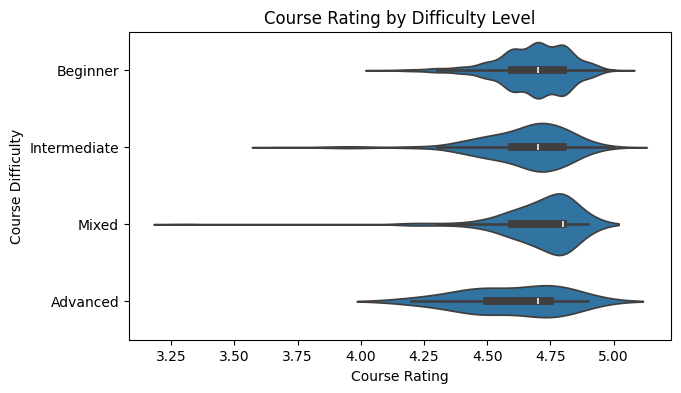

In [ ]:
plt.figure(figsize=(7, 4))
sns.violinplot(y='Course Difficulty', x='Course Rating', data=df)
plt.title('Course Rating by Difficulty Level')
plt.ylabel('Course Difficulty')
plt.xlabel('Course Rating')
plt.show()

**Insights:**

* Advanced courses have the highest and most consistent ratings, mostly between 4.6 and 4.9, with none below 4.1. This suggests that their ratings are more reliable, reflecting high-quality, niche content despite their smaller number.

* Mixed and Beginner courses also have high averages, but their ratings are concentrated between 4.6 and 4.8. This may indicate rating inflation, as their popularity and large number of courses could lead to higher-than-expected scores.

* Intermediate courses show more variability in ratings, with some as low as 3.7. This suggests they cover a wider range of topics and difficulty, leading to more inconsistent quality.

**Course Organization vs. Ratings and Enrollment**

Top 10 by Average Rating

In [ ]:
ratings_students = df.groupby('Course Organization').agg({
    'Course Rating': 'mean',
    'Course Students Enrolled': 'mean'
}).sort_values('Course Rating', ascending=False).round(2).head(10)

ratings_students.columns = ['Average Rating', 'Average Students Enrolled']
ratings_students


,Average Rating,Average Students Enrolled
Course Organization,,
Crece con Google,4.90,8800.0
Google - Spectrum Sharing,4.90,210000.0
"Nanyang Technological University, Singapore",4.90,47000.0
London Business School,4.90,57000.0
Universidade Estadual de Campinas,4.90,17000.0
ScrumTrek,4.90,12000.0
Hebrew University of Jerusalem,4.90,95000.0
Universidade de São Paulo,4.87,68500.0
The University of Chicago,4.85,84000.0


Top 10 by Average Student Enrollment

In [ ]:
mean_students = df.groupby('Course Organization').agg({
    'Course Students Enrolled': 'mean',
    'Course Rating': 'mean'
}).sort_values('Course Students Enrolled', ascending=False).round(2).head(10)
mean_students.name = 'Top 10 by Average Student Enrollment'
mean_students

,Course Students Enrolled,Course Rating
Course Organization,,
Stanford University,303375.00,4.77
Yale University,232470.59,4.82
McMaster University,230000.00,4.80
Google - Spectrum Sharing,210000.00,4.90
Ludwig-Maximilians-Universität München (LMU),192500.00,4.75
École Polytechnique,190000.00,4.80
University of Michigan,181407.32,4.73
Georgia Institute of Technology,181300.00,4.66
deeplearning.ai,178962.50,4.74


* Organizations like Stanford, Yale, and Google have high average enrollments, indicating strong brand recognition.
* However, the top-rated courses are often from smaller or less well-known institutions.
* Popularity (measured by students) and perceived quality (measured by rating) don't always align.

**Extreme Values**

Courses with the Highest Enrollment

In [ ]:
df[df['Course Students Enrolled'] > 1000000][['Course Title',
        'Course Organization', 'Course Students Enrolled', 'Course Rating']]

,Course Title,Course Organization,Course Students Enrolled,Course Rating
564,Machine Learning,Stanford University,3200000,4.9
674,Programming for Everybody (Getting Started wit...,University of Michigan,1300000,4.8
688,Python for Everybody,University of Michigan,1500000,4.8
815,The Science of Well-Being,Yale University,2500000,4.9


Courses like Machine Learning (Stanford) and Python for Everybody (University of Michigan) have millions of students and very high ratings (4.8 and 4.9).

Courses with Very Low Enrollment

In [ ]:
df[df['Course Students Enrolled'] < 2000][['Course Title',
            'Course Organization', 'Course Students Enrolled', 'Course Rating']]

,Course Title,Course Organization,Course Students Enrolled,Course Rating
93,Blended Language Learning: Design and Practice...,University of Colorado Boulder,1900,4.8
96,Blockchain Revolution in Financial Services,INSEAD,1600,4.6
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,1500,5.0
280,Esports,"University of California, Irvine",1800,4.5
406,Healthcare Law,University of Pennsylvania,1700,4.7
423,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,1700,4.9
432,Infectious Disease Modelling,Imperial College London,1600,5.0
810,The Pronunciation of American English,"University of California, Irvine",1700,4.6


Some courses with very few students still receive perfect scores (5.0), which may reflect biased or early-stage ratings.

 Courses with Perfect Ratings (5.0)

In [ ]:
df[df['Course Rating'] > 4.9][['Course Title', 'Course Organization',
                               'Course Students Enrolled', 'Course Rating']]

,Course Title,Course Organization,Course Students Enrolled,Course Rating
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,1500,5.0
432,Infectious Disease Modelling,Imperial College London,1600,5.0


The only two courses with a perfect 5.0 rating have under 2000 students. These may be too new or niche to provide reliable feedback.

Courses with Low Ratings (< 4.0)

In [ ]:
df[df['Course Rating'] < 4][['Course Title', 'Course Organization',
                             'Course Students Enrolled', 'Course Rating']]

,Course Title,Course Organization,Course Students Enrolled,Course Rating
413,How To Create a Website in a Weekend! (Project...,The State University of New York,140000,3.3
566,Machine Learning and Reinforcement Learning in...,New York University,29000,3.7
569,Machine Learning for Trading,Google Cloud,15000,3.9
873,iOS App Development with Swift,University of Toronto,76000,3.9


Several poorly rated courses are in the tech field and come from reputable institutions. This opens interesting questions about content quality or expectations mismatch.

**Insights:**
* Highly rated courses are not always the most popular.
* Some of the lowest-rated courses have surprisingly high enrollment, suggesting marketing or brand influence.
* Recently launched courses often appear among the least enrolled.

#Course Popularity by Student Bins

To better understand how student enrollment is distributed across courses, we grouped courses into predefined intervals ("bins") based on the number of enrolled students.

<ipython-input-17-25b2e6b6999b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Student Bins', palette='Blues')
<ipython-input-17-25b2e6b6999b>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_ratings = df.groupby('Student Bins')['Course Rating'].mean().round(2)
<ipython-input-17-25b2e6b6999b>:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


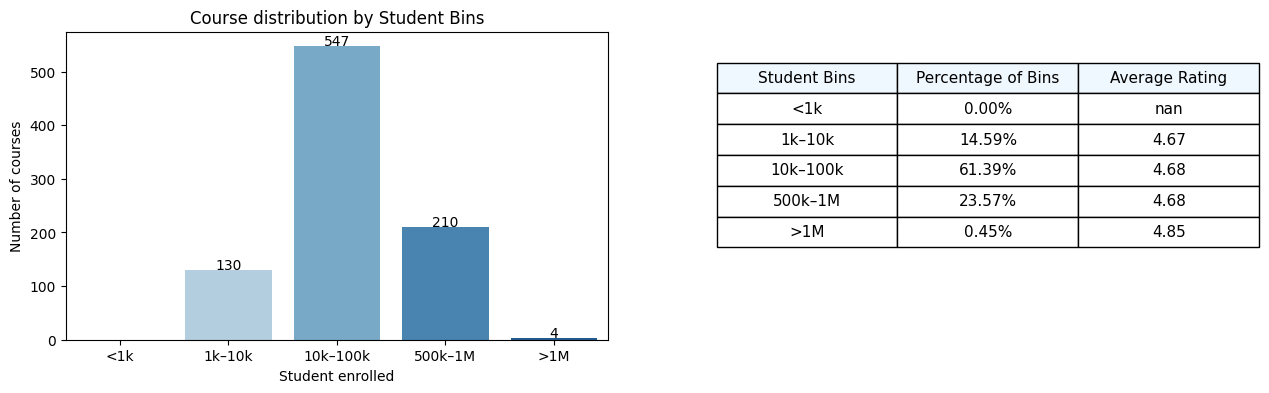

In [ ]:
stud_bins = pd.cut(
    df['Course Students Enrolled'],
    labels = ['<1k', '1k–10k', '10k–100k', '500k–1M', '>1M'],
    bins=[0, 1000, 10000, 100000, 1000000, 3500000]
)
df['Student Bins'] = stud_bins
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df, x='Student Bins', palette='Blues')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 1, int(height), ha='center', fontsize=10)
plt.title('Course distribution by Student Bins')
plt.xlabel('Student enrolled')
plt.ylabel('Number of courses')

bins_count = df['Student Bins'].value_counts().sort_index()
percent_bins = (bins_count / bins_count.sum()) * 100
formatted_percent_bins = percent_bins.map("{:.2f}%".format)

avg_ratings = df.groupby('Student Bins')['Course Rating'].mean().round(2)
labels = ['<1k', '1k–10k', '10k–100k', '500k–1M', '>1M']
bins_table = pd.DataFrame({
    'Student Bins': labels,
    'Percentage of Bins': formatted_percent_bins.reindex(labels).values,
    'Average Rating': avg_ratings.reindex(labels).values
})

percent_table = plt.table(cellText=bins_table.values, colLabels=bins_table.columns,
                  loc='right', cellLoc='center', colColours=["aliceblue"]*3,
                  bbox=[1.2, 0.3, 1.0, 0.6])

percent_table.auto_set_font_size(False)
percent_table.set_fontsize(11)

plt.tight_layout()
plt.show()


* Most courses fall into the 10K-100K student bin, showing moderate popularity with stable average ratings around 4.6-4.7. This suggests consistent quality across widely taken courses.
* Only 4 courses exceed 1M students, making them clear outliers. Their high average rating of 4.85 may reflect strong brand recognition and student trust.
* Courses in the 500K-1M range are also rare (10 total) but maintain high ratings (4.7-4.8), reinforcing the link between popularity and quality.
* No courses have under 1K students, indicating a visibility threshold or dataset filtering.
* Overall, larger student bases often correlate with slightly higher ratings, though niche or smaller courses can also score well, depending on content quality.

#Summary

The bivariate analysis provided deeper insights into how different variables interact within the dataset. Key findings include:

* Courses with certificates tend to attract more students. This shows that learners consider certificates to add value. While courses with Professional Certificates have the highest average number of students per course, the regular type of course attracts the highest number of students overall. This is simply because there are many more of them in the dataset.
* Course difficulty shows a visible impact on enrollment: beginner courses are the most popular, while advanced courses tend to have fewer students.
* Some highly rated courses have relatively low enrollment, indicating that niche or newly released content may not yet have reached a broad audience.
* The majority of courses fall into the 10K-100K student bin, confirming that most content enjoys moderate popularity rather than viral success.

Together, these findings highlight how certification type, course difficulty, and student interest interconnect to influence a course's overall reach and success.

# **Conclusions**
This exploratory analysis of 891 Coursera courses revealed key trends in course quality, popularity, difficulty, certification, and providers:

* **Ratings & Quality**: The average rating is 4.4. Most courses (about 99.5%) are rated above 4.0, with 63% in the 4.2–4.7 range and 36% rated even higher (4.8–4.9). This skew toward high ratings may reflect rating inflation or limited critical feedback, especially since many top-rated courses have low enrollment.
* **Enrollment & Popularity**: While higher-rated courses tend to attract more students, the correlation is moderate. Some courses with ~4.0 ratings still surpass 100K enrollments, likely due to topic relevance or brand recognition. Outliers exist — a few courses exceed 1 million students, skewing the average.
* **Difficulty & Reach**: Beginner-level courses make up nearly 60% of the dataset and show the highest average enrollment (~30K), highlighting demand for accessible content.
* **Certification & Impact**: Courses offering a “Professional Certificate” have the highest average enrollment (~40K), though standard Course types dominate total enrollment due to volume. Beginner-level courses with Professional Certificates are especially effective in reaching large audiences.
* **Top Providers**: Organizations like Stanford, Yale, and Google consistently offer courses with both high ratings and high enrollments, emphasizing the importance of brand trust and industry alignment.
* **Popularity vs. Perceived Quality**: Courses with larger student bases tend to receive slightly higher ratings. Those exceeding 1M enrollments show the highest ratings (~4.85), suggesting a potential link between popularity, visibility, and perceived quality.

# Suggestions for Further Analysis
To deepen the insights, future analysis could explore:

* Course topics/categories to identify which subjects attract most interest.
* Course duration and structure to evaluate what formats drive engagement.
* Price and financial aid impact on student decisions.
* The number of ratings per course, to assess the reliability of course scores.
* Time-series trends, especially for new vs. long-standing courses.